In [2]:
import pickle
import mgf_math
import geneMGF
import sympy
sympy.init_printing()

The goal here is to get general expressions for the central moments trait values in exchangeable samples of individuals. For a moment of order $k$ we have to consider a sample size of at least $k$. 

In [31]:
test_mgf_2 = mgf_math.traitMGF(nIndiv = 2)
test_mgf_2.make_mgf(order = 2, approx_type = "exchangeable")

In [35]:
mom_x1x1_2 = test_mgf_2.calc_moment(pows = [2,0], approx_type = "exchangeable").simplify().expand()
mom_x1x1_2

making mgf approx...
mgf already created!
simplifying mgf...
taking derivative k_0 order 1
taking derivative k_0 order 2


In [36]:
mom_x1_2 = test_mgf_2.calc_moment(pows = [1,0], approx_type = "exchangeable").simplify().expand()
mom_x1_2

In [37]:
mom_x1x1_2 - mom_x1_2**2

In [38]:
mom_x1x2_2 = test_mgf_2.calc_moment(pows = [1,1], approx_type = "exchangeable")
mom_x1x2_2

making mgf approx...
mgf already created!
simplifying mgf...
taking derivative k_0 order 1
taking derivative k_1 order 1


If we want to know the expected second central moment in the population, $E[h_2]=E[\frac{1}{N}\sum_N(\bar{Y} - Y_i)^2]$, this can be calculated from the expected sample moments of a sample of size two. These are $E[Y_1^2]$ and $E[Y_1Y_2]$. We can calculate this as follows.

In [8]:
mom_x1x1_2 - mom_x1x2_2

Looking at this we can see that the terms $t_{0x0}$ and $t_{0x1}$ should be equal because the branches subtending $0$ and $1$ in a sample of size two will always have the same length. The expression therefore simplifies to $m_{2} t_{0} \theta$. We want the computer to notice this equality and simplify the expression for us. However, coding up such a system of algebra would take some time and effort to get right. Instead, we will rewrite the expressions in terms of $T_{i.n}$, the expected time in a sample of size $n$ that there are $i$ lineages remaining. 

In [39]:
mgf_math.sub_all_ti(mom_x1x1_2, [['0'], ['1']]).simplify().expand()

In [40]:
mgf_math.sub_all_ti(mom_x1x2_2, [['0'], ['1']]).simplify().expand()

In [41]:
(mgf_math.sub_all_ti(mom_x1x1_2, [['0'], ['1']]) - 
 mgf_math.sub_all_ti(mom_x1x2_2, [['0'], ['1']])).simplify().expand()

Now let's do the same thing for the third and fourth central moments.

In [42]:
test_mgf_3 = mgf_math.traitMGF(nIndiv = 3)
test_mgf_3.make_mgf(order = 3, approx_type = "exchangeable")

In [13]:
mom_x1x1x1_3 = test_mgf_3.calc_moment(pows = [3,0,0], approx_type = "exchangeable").simplify().expand()
mom_x1x1x1_3

making mgf approx...
mgf already created!
simplifying mgf...
taking derivative k_0 order 1
taking derivative k_0 order 2
taking derivative k_0 order 3


In [14]:
mom_x1x1x2_3 = test_mgf_3.calc_moment(pows = [2,1,0], approx_type = "exchangeable").simplify().expand()
mom_x1x1x2_3

making mgf approx...
mgf already created!
simplifying mgf...
taking derivative k_0 order 1
taking derivative k_0 order 2
taking derivative k_1 order 1


In [15]:
mgf_math.sub_all_ti(mom_x1x1x2_3, [['0'], ['1'], ['2']]).simplify().expand()

In [16]:
mom_x1x2x3_3 = test_mgf_3.calc_moment(pows = [1,1,1], approx_type = "exchangeable").simplify().expand()
mom_x1x2x3_3

making mgf approx...
mgf already created!
simplifying mgf...
taking derivative k_0 order 1
taking derivative k_1 order 1
taking derivative k_2 order 1


In [17]:
mgf_math.sub_all_ti(mom_x1x2x3_3, [['0'], ['1'], ['2']]).simplify().expand()

The expression for the expected third central moment in the population is $E[h_3]=E[\frac{1}{N}\sum_N(\bar{Y} - Y_i)^3] = E[Y_1^3] + 2E[Y_1Y_2Y_3] - 3E[Y_1^2Y_2]$.

In [18]:
(mgf_math.sub_all_ti(mom_x1x1x1_3, [['0'], ['1'], ['2']]) + 
 2*mgf_math.sub_all_ti(mom_x1x2x3_3, [['0'], ['1'], ['2']]) - 
 3*mgf_math.sub_all_ti(mom_x1x1x2_3, [['0'], ['1'], ['2']])).simplify().expand()

Doing the same for the fourth central moment is significantly more computationally intensive. For this reason we'll load a moment generating function that was previously put together.

In [3]:
with open("test_mgf_4.pyc", "rb") as fin:
    test_mgf_4 = pickle.load(fin)

In [4]:
mom_x1x2x3x4_4 = test_mgf_4.calc_moment([1,1,1,1], approx_type = "exchangeable")

In [5]:
mom_x1x1x2x3_4 = test_mgf_4.calc_moment([2,1,1,0], approx_type = "exchangeable")

In [6]:
mom_x1x1x1x2_4 = test_mgf_4.calc_moment([3,1,0,0], approx_type = "exchangeable")

In [7]:
mom_x1x1x1x1_4 = test_mgf_4.calc_moment([4,0,0,0], approx_type = "exchangeable")

In [30]:
with open("test_mgf_4.pyc", "wb") as fout:
    pickle.dump(test_mgf_4, fout)

The expression for the fourth central moment is $h_4=E[\frac{1}{N}\sum_N(\bar{Y} - Y_i)^4] = E[Y_1^4] + 6E[Y_1^2Y_2Y_3] - 4E[Y_1^3Y_2] - 3E[Y_1Y_2Y_3Y_4]$.

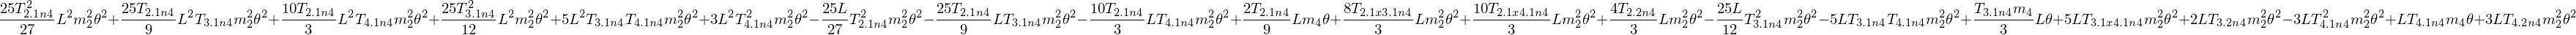

In [162]:
(mgf_math.sub_all_ti(mom_x1x1x1x1_4, [['0'], ['1'], ['2'], ['3']]) + 
6*mgf_math.sub_all_ti(mom_x1x1x2x3_4, [['0'], ['1'], ['2'], ['3']]) - 
4*mgf_math.sub_all_ti(mom_x1x1x1x2_4, [['0'], ['1'], ['2'], ['3']]) - 
3*mgf_math.sub_all_ti(mom_x1x2x3x4_4, [['0'], ['1'], ['2'], ['3']])).simplify().expand()

In [ ]:
(mom_x1x1x1x1_4 + 
6*mom_x1x1x2x3_4 - 
4*mom_x1x1x1x2_4 - 
3*mom_x1x2x3x4_4).simplify().expand()

A bit of simplification can be done to this expression. Terms of order $L^2\theta^2$ can be gathered to make $$\frac{1}{3}\left( \frac{5}{3}E[T_2] + \frac{5}{2}E[T_3] + 3E[T_4] \right)^2\left( L\theta m_2\right)^2$$ This is equivalent to $3\left( \tau_2 L\theta m_2 \right)^2$, where $\tau_2$ is the expected pairwise coalescent time because $\tau_2 = \frac{5}{9}E[T_2] + \frac{5}{6}E[T_3] + E[T_4]$. Some terms of order $L\theta^2$ also have this exact same form giving $3L(L-1)\left( \tau_2 \theta m_2 \right)^2$. The remaining order $L \theta^2$ have a more complicated form as $\frac{L m_2^2 \theta^2}{3}\left(4 E[T_2^2] + 8 E[T_3T_2] + 15 E[T_4T_3] + 6 E[T_3^2] + 10 E[T_4T_2] + 9 E[T_4^2]\right)$. It's not clear what the interpretation of this term should be. The final terms are order $L \theta$. These give $L m_4 \theta \left( T_4 + \frac{1}{3} T_3 + \frac{2}{9} T_2 \right)$. This term does not have an ultra clear explanation either.